In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("The Shape of X_train: ", X_train.shape)
print("The Shape of y_train: ", y_train.shape)
print("The Shape of X_test: ", X_test.shape)
print("The Shape of y_test: ", y_test.shape)

The Shape of X_train:  (60000, 28, 28)
The Shape of y_train:  (60000,)
The Shape of X_test:  (10000, 28, 28)
The Shape of y_test:  (10000,)


In [5]:
print(X_train[0].max())
print(X_train[0].min())

255
0


In [6]:
X_train = X_train / 255
X_test = X_test / 255

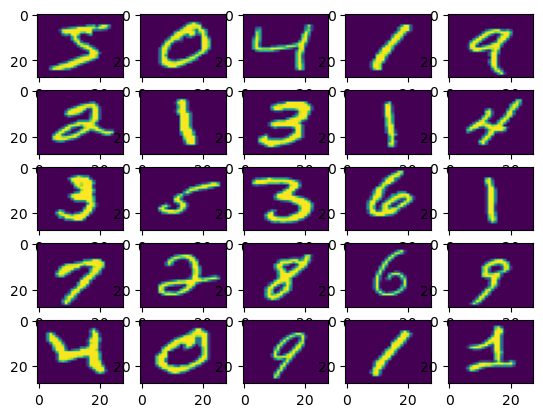

In [7]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1

plt.show()

In [9]:
encoder = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(800, activation='relu'),
    Dense(400, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu')
])

In [10]:
decoder = Sequential([
    Dense(50, input_shape=[25], activation='relu'),
    Dense(100, activation='relu'),
    Dense(200, activation='relu'),
    Dense(400, activation='relu'),
    Dense(800, activation='relu'),
    Dense(28 * 28, activation='sigmoid'),
    Reshape([28, 28])
])

In [11]:
autoencoder = Sequential([encoder, decoder])

In [12]:
autoencoder.compile(optimizer=SGD(learning_rate=1.5), loss='binary_crossentropy')

In [13]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 25)                1055025   
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            1055784   
                                                                 
Total params: 2,110,809
Trainable params: 2,110,809
Non-trainable params: 0
_________________________________________________________________


In [14]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 200)               80200     
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 25)                1

In [15]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1300      
                                                                 
 dense_7 (Dense)             (None, 100)               5100      
                                                                 
 dense_8 (Dense)             (None, 200)               20200     
                                                                 
 dense_9 (Dense)             (None, 400)               80400     
                                                                 
 dense_10 (Dense)            (None, 800)               320800    
                                                                 
 dense_11 (Dense)            (None, 784)               627984    
                                                                 
 reshape (Reshape)           (None, 28, 28)           

In [16]:
autoencoder.fit(X_train, X_train, validation_data=[X_test, X_test], epochs=50)

Epoch 1/50
1875/1875 [==============================] - 51s 25ms/step - loss: 0.2552 - val_loss: 0.2230
Epoch 2/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2029 - val_loss: 0.1874
Epoch 3/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1678 - val_loss: 0.1509
Epoch 4/50
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1492 - val_loss: 0.1454
Epoch 5/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1410 - val_loss: 0.1383
Epoch 6/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1365 - val_loss: 0.1330
Epoch 7/50
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1331 - val_loss: 0.1343
Epoch 8/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1305 - val_loss: 0.1284
Epoch 9/50
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1278 - val_loss: 0.1279
Epoch 10/50
1875/1875 [==============================] - 46s 25m

In [17]:
reconstructed_images = autoencoder.predict(X_test)

313/313 [==============================] - 3s 8ms/step


Original Handwritten Digit


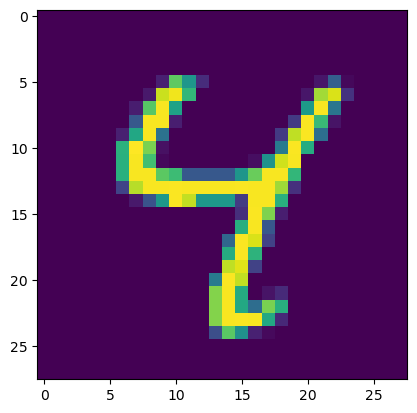

Reconstructed Digit by the AutoEncoder


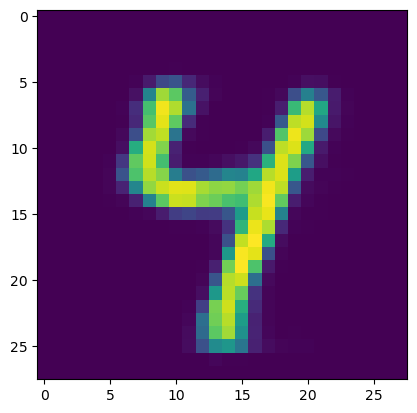

In [25]:
n = int(random.random() * 10)
print("Original Handwritten Digit")
plt.imshow(X_test[n])
plt.show()
print("Reconstructed Digit by the AutoEncoder")
plt.imshow(reconstructed_images[n])

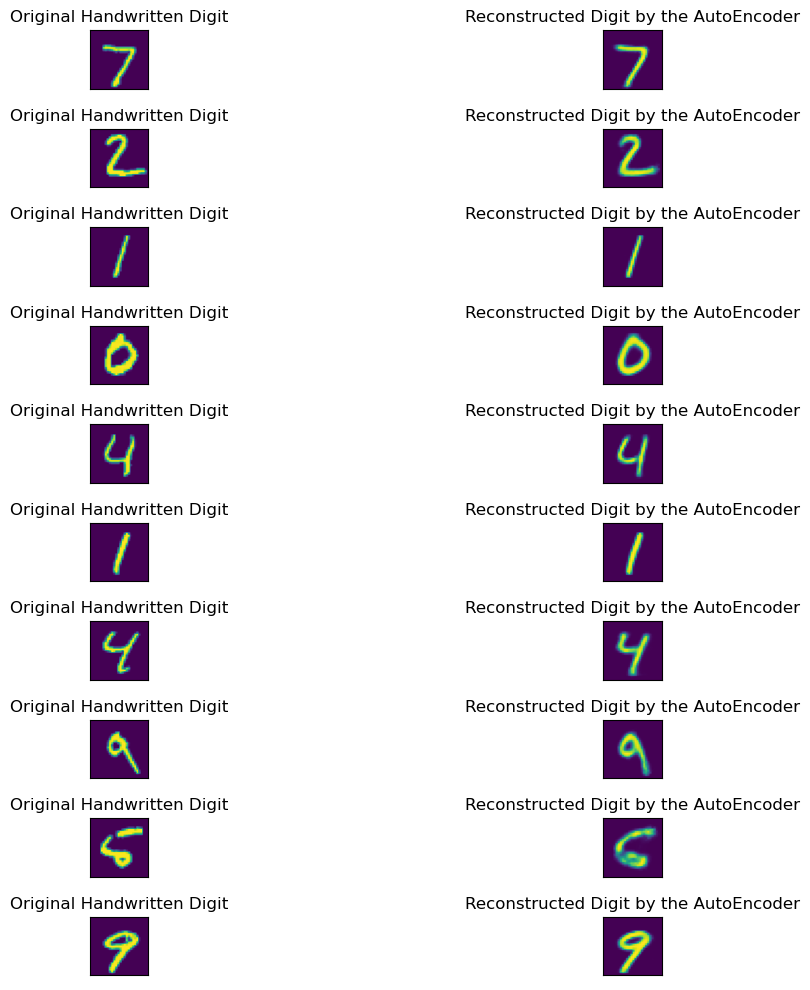

In [28]:
fig, axes = plt.subplots(10, 2, figsize=(15, 10))

for i in range(10):
    axes[i, 0].imshow(X_test[i])
    axes[i, 0].set_title("Original Handwritten Digit")
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])

    axes[i, 1].imshow(reconstructed_images[i])
    axes[i, 1].set_title("Reconstructed Digit by the AutoEncoder")
    axes[i, 1].set_xticks([])
    axes[i, 1].set_yticks([])

plt.tight_layout()
plt.show()